In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging=BaggingClassifier(KNeighborsClassifier(),max_features=0.5,max_samples=0.5,)


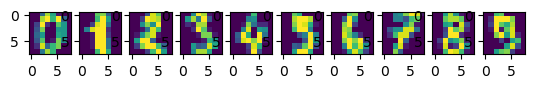

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [10]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [14]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6860321384425216


In [22]:
tirages = 100
tab_score_accuracy= []
for i in range(tirages):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=i)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    tab_score_accuracy.append(acc)

variance_accuracy = np.var(tab_score_accuracy)
print(variance_accuracy)

0.000853001806011175


In [30]:

accuracy=clf.score(X_test,y_test)

tab_score_accuracy_bag= []
for i in range(tirages):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=i)
    clf=BaggingClassifier(tree.DecisionTreeClassifier(),
    max_samples=0.5, max_features=0.5, n_estimators=200)

    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    tab_score_accuracy_bag.append(acc)
variance_bag = np.var(acc)
print(variance_bag)

0.0


In [ ]:

# Liste des valeurs de n_estimators à tester
n_estimators_list = [1, 5, 10, 50, 100, 200, 300]
tab_score_accuracy_bag= []
for i in n_estimators_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=0)
    clf=BaggingClassifier(tree.DecisionTreeClassifier(),
    max_samples=0.5, max_features=0.5, n_estimators=i)

    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    tab_score_accuracy_bag.append(acc)
# Tracé du graphique
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, tab_score_accuracy_bag, marker='o')
plt.xlabel("Nombre d'arbres (n_estimators)")
plt.ylabel("Accuracy")
plt.title("BaggingClassifier : Accuracy vs n_estimators")
plt.grid(True)
plt.show()

In [16]:

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier



# Séparation fixe : 10% train, 90% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

# RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=200, random_state=0)
clf_rf.fit(X_train, y_train)
acc_rf = clf_rf.score(X_test, y_test)

# ExtraTreesClassifier
clf_et = ExtraTreesClassifier(n_estimators=200, random_state=0)
clf_et.fit(X_train, y_train)
acc_et = clf_et.score(X_test, y_test)

print(f"Accuracy RandomForest (200 arbres) : {acc_rf:}")
print(f"Accuracy ExtraTrees (200 arbres)   : {acc_et:}")


Accuracy RandomForest (200 arbres) : 0.9060568603213844
Accuracy ExtraTrees (200 arbres)   : 0.9221260815822002


In [26]:
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf=AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5),n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

F:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.92336217552534


In [32]:
import pandas as pd
# Paramètres à tester
max_depth_list = [1, 3, 5, None]
learning_rate_list = [0.5, 1.0, 2.0]
n_estimators_list = [50, 100, 200]


results = []

for depth in max_depth_list:
    for lr in learning_rate_list:
        for n in n_estimators_list:
            base_estimator = tree.DecisionTreeClassifier(max_depth=depth) if depth is not None else tree.DecisionTreeClassifier()
            clf_ab = AdaBoostClassifier(estimator=base_estimator, n_estimators=n, learning_rate=lr, random_state=42)
            clf_ab.fit(X_train, y_train)
            acc = clf_ab.score(X_test, y_test)
            results.append({
                'max_depth': depth if depth is not None else 'None',
                'learning_rate': lr,
                'n_estimators': n,
                'accuracy': acc
            })

df_results = pd.DataFrame(results)

F:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boos